# Some Protocols for Fair Division

In [1]:
from problem import Problem
import fairness_measures
#import simulations

Several protocols have been implemented. They can be accessed by importing the module protocols. 

In [2]:
import protocols

In [4]:
p0 = Problem(3,6,'empty', centralized=True)
p0.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0,'r5':0},\
{'r0':1,'r1':2,'r2':5,'r3':3,'r4':8,'r5':1},\
{'r0':2,'r1':3,'r2':9,'r3':1,'r4':2,'r5':3}])
print (p0)
print (p0.printAllocation())

agent 1{'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3, 'r4': 8, 'r5': 1}
agent 2{'r0': 2, 'r1': 3, 'r2': 9, 'r3': 1, 'r4': 2, 'r5': 3}

auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0



## 4.1 Adjusted Winner

In [5]:
p1 = Problem(3,4,'normalized',centralized=True)
print(p1)

agent 1{'r0': 0.322, 'r1': 0.087, 'r2': 0.301, 'r3': 0.29}
agent 2{'r0': 0.353, 'r1': 0.151, 'r2': 0.092, 'r3': 0.403}



In [6]:
protocols.adjustedWinner(p0,verbose=True)

Output allocation phase:
auctioneer                                  []	
agent  1                       ['r3', 'r4']	11
agent  2           ['r0', 'r1', 'r2', 'r5']	17

[(1.5, 'r1'), (2.0, 'r0'), (1.8, 'r2'), (3.0, 'r5')]
Resource  r1  moves from  2  to  1
Resource  r2  will be splitted!
Agent  1  gets  0.071  of resource  r2
Both agents get utility: 13.355


(13.355, 0.07142857142857142)

Make sure that you understand exactly why items are allocated this way. 

### Question: Manipulating Adjusted Winner

In [7]:
p2 = Problem(3,2,'uniform',centralized=True)
p2.setUtilities(
[{'r0':0,'r1':0},\
{'r0':74,'r1':26},\
{'r0':75,'r1':25}]
)
print (p2)

agent 1{'r0': 74, 'r1': 26}
agent 2{'r0': 75, 'r1': 25}



In that case, the output of the adjusted winner protocol is rather obvious. Each agent gets its preferred item and everyone enjoys 75 of utility. 

In [9]:
protocols.adjustedWinner(p2,verbose=True)

Output allocation phase:
auctioneer                                  []	
agent  1                             ['r1']	26
agent  2                             ['r0']	75

[(1.014, 'r0')]
Resource  r0  will be splitted!
Agent  1  gets  0.329  of resource  r0
Both agents get utility: 50.346000000000004


(50.346000000000004, 0.3288590604026846)

But can you find a **manipulation** for agent 1, that is, a way to misrepresent the preferences of the agent (in other words, announce a valuation for an item which differs from the real one) such that the utility is in reality higher? 
Note that you will need to compute the allocation with the **declared** preferences, but that the actual utility enjoyed by agents must be computed with their **true** preferences. 

What is the "best" manipulation that agent 1 can do? 
To evaluate this, it will be useful to run a script trying all the different values possibly announced by agent 1, and to plot the utility obtained with each of these. 

## 4. 2 Picking Sequences

In [10]:
p3 = Problem(4,6,'empty', centralized=True)
p3.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0,'r5':0},\
{'r0':1,'r1':2,'r2':5,'r3':3,'r4':7,'r5':2},\
{'r0':2,'r1':6,'r2':8,'r3':1,'r4':1,'r5':2},\
{'r0':5,'r1':4,'r2':4,'r3':3,'r4':2,'r5':2}]
)
print (p3)
print (p3.printAllocation())

agent 1{'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3, 'r4': 7, 'r5': 2}
agent 2{'r0': 2, 'r1': 6, 'r2': 8, 'r3': 1, 'r4': 1, 'r5': 2}
agent 3{'r0': 5, 'r1': 4, 'r2': 4, 'r3': 3, 'r4': 2, 'r5': 2}

auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0



Let us apply a picking sequence on our problem p3.

In [11]:
s0 = [1,2,3,2,3,1]
protocols.pickingSequence(p3,s0,verbose=True)

agent  1  picks  r4
agent  2  picks  r2
agent  3  picks  r0
agent  2  picks  r1
agent  3  picks  r3
agent  1  picks  r5


In [12]:
print(p3.printAllocation())

auctioneer                                  []	
agent  1                       ['r4', 'r5']	 9
agent  2                       ['r2', 'r1']	14
agent  3                       ['r0', 'r3']	 8



In [13]:
print(fairness_measures.envyMatrix(p3))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


It is also possible to generate standard sequences, like balanced or alternate ones. 

In [34]:
s= protocols.generateSequence(3,6,'balanced')
print(s)

[1, 2, 3, 3, 2, 1]


### Question: What is the fairest picking sequence?

In [3]:
import simulations

Let us consider 3 agents and 5 items. Can you propose some sequence which would do well in terms of egalitarian social welfare? You can simulate a number of picking sequences by specifying: the number of experiments, the number of agents (remember to count agent 0 here-to be fixed sorry), the number of objects, the sequence, and the ways utilities are generated.
    

In [24]:
simulations.simulationPickingSequences(1000,4,5,[1,3,2,2,3],'borda',verbose=False) # to start with a bad sequence

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                   5.0
= Ratio of proportional:                  1.0
= Ratio of envy free:                    0.301
= Average number of envious:             0.761
= Average max envy:                       1.05
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



In [39]:
s= protocols.generateSequence(3,6,'balanced')
print(s)

[1, 2, 3, 3, 2, 1]


In [61]:
simulations.simulationPickingSequences(1000,4,5,[1,2,3,3,2],'borda',verbose=False)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                   5.0
= Ratio of proportional:                  1.0
= Ratio of envy free:                    0.297
= Average number of envious:             0.777
= Average max envy:                      1.024
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



### And to conclude: 
For 3 agents, and 6 and 8 objects, could you find the fairest picking sequences in terms of: 
* egalitarian social welfare
* average max envy

For 3 agents and 6 objects :

In [63]:
simulations.simulationPickingSequences(1000,4,6,[1,1,3,2,2,3],'borda',verbose=False) # to start with a bad sequence

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                 7.604
= Ratio of proportional:                 0.79
= Ratio of envy free:                    0.503
= Average number of envious:             0.588
= Average max envy:                      1.453
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



In [59]:
# good sequence
s= protocols.generateSequence(3,6,'balanced')
print(s)
simulations.simulationPickingSequences(1000,4,6,s,'borda',verbose=False)

[1, 2, 3, 3, 2, 1]
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                 8.341
= Ratio of proportional:                  1.0
= Ratio of envy free:                    0.752
= Average number of envious:             0.273
= Average max envy:                      0.309
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



For 3 agents and 8 objects :

In [4]:
simulations.simulationPickingSequences(1000,4,8,[1,2,3,1,2,3,1,2],'borda',verbose=False) # to start with a bad sequence

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                13.415
= Ratio of proportional:                0.895
= Ratio of envy free:                    0.548
= Average number of envious:             0.487
= Average max envy:                      1.079
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



In [72]:
# good sequence
simulations.simulationPickingSequences(1000,4,8,[1,2,3,3,2,1,2,3],'borda',verbose=False)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                13.892
= Ratio of proportional:                0.965
= Ratio of envy free:                    0.719
= Average number of envious:              0.29
= Average max envy:                       0.58
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



## 4.3 Lipton et al. protocol

Let us now test the protocol of Lipton, which allocates items one by one and solves envy cycles when they occur. 

In [25]:
p4 = Problem(4,6,'empty','centralized')
print(p4)
print(p4.printAllocation())
p4.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0,'r5':0},\
{'r0':1,'r1':2,'r2':5,'r3':3,'r4':7,'r5':2},\
{'r0':2,'r1':6,'r2':8,'r3':1,'r4':1,'r5':2},\
{'r0':5,'r1':4,'r2':4,'r3':3,'r4':2,'r5':2}]
)
print(p4)

protocols.lipton(p4)

agent 1{'r0': 0, 'r1': 0, 'r2': 0, 'r3': 0, 'r4': 0, 'r5': 0}
agent 2{'r0': 0, 'r1': 0, 'r2': 0, 'r3': 0, 'r4': 0, 'r5': 0}
agent 3{'r0': 0, 'r1': 0, 'r2': 0, 'r3': 0, 'r4': 0, 'r5': 0}

auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0

agent 1{'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3, 'r4': 7, 'r5': 2}
agent 2{'r0': 2, 'r1': 6, 'r2': 8, 'r3': 1, 'r4': 1, 'r5': 2}
agent 3{'r0': 5, 'r1': 4, 'r2': 4, 'r3': 3, 'r4': 2, 'r5': 2}

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Running the Lipton et al. protocol
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0

envy graph: {0: [], 1: [], 2: [], 3: []}
allocating resource  r0
auctioneer      ['r1', 'r2', 'r3', 'r4',

## 4.4 Local deals

Finally, let us play a bit with local exchanges. For this, we will need to create a decentralized MARA problem. Items are intially allocated at random among agents. Here, utilities are Borda. 

In [25]:
p5 = Problem(4,6,'borda',centralized=False)
print(p5)
print(p5.printAllocation())


agent 0{'r0': 6, 'r1': 2, 'r2': 1, 'r3': 4, 'r4': 3, 'r5': 5}
agent 1{'r0': 4, 'r1': 6, 'r2': 1, 'r3': 3, 'r4': 5, 'r5': 2}
agent 2{'r0': 6, 'r1': 3, 'r2': 1, 'r3': 2, 'r4': 5, 'r5': 4}
agent 3{'r0': 6, 'r1': 5, 'r2': 1, 'r3': 2, 'r4': 3, 'r5': 4}

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                 ['r0', 'r1', 'r4']	11
agent  1                             ['r3']	 3
agent  2                             ['r2']	 1
agent  3                             ['r5']	 4



Can you spot which agents could perform mutually beneficial deals? 

In [27]:
protocols.randomDynamics(p5,True)

agent  2  meets agent  3
deal between  2  and  3 for  r0  and  r1
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                             ['r5']	 5
agent  1                             ['r2']	 3
agent  2                 ['r3', 'r4', 'r1']	15
agent  3                             ['r0']	 6

agent  0  meets agent  3
agent  1  meets agent  3
agent  0  meets agent  2
agent  0  meets agent  1
deal between  0  and  1 for  r5  and  r2
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                             ['r2']	 6
agent  1                             ['r5']	 4
agent  2                 ['r3', 'r4', 'r1']	15
agent  3                             ['r0']	 6

agent  0  meets agent  1
agent  2  meets agent  3
agent  1  meets agent  3
agent  1  meets agent  2
agent  0  meets agent  3
agent  0  meets agent  2
End of dynamics. No more deal possible.


Let us check the envy of the final allocation. 

In [28]:
m = fairness_measures.envyMatrix(p5)
g = fairness_measures.buildEnvyGraph(m)
print (g)

{0: [2], 1: [2], 2: [], 3: [2]}


### Question: Could you find fairer dynamics?

As it stands, agents just meet randomly (a given pair is picked uniformly among the possible ones). 
Could you conceive a fairer dynamics and test it? 

### Question: BT protocol with contested pile

Code the BT protocol, and return the size of the contested pile, the Borda score of agents as well as whether the allocation is EF under the definition seen during the course. When increasing the number of objects, plot the likelihood of the protocol returning an EF allocation. 

In [157]:
def BT_name_prefered_items(p):
    preferences_A = p.agent[0].u.copy()
    preferences_B = p.agent[1].u.copy()
    preferences_A = list(dict(sorted(preferences_A.items(), key=lambda item: item[1], reverse=True)).keys())
    preferences_B = list(dict(sorted(preferences_B.items(), key=lambda item: item[1], reverse=True)).keys())
    return preferences_A,preferences_B

def BT_allocation(preferences_A, preferences_B):
    contested_pile = []
    A = []
    B = []
    while(True):
        if preferences_A[0] != preferences_B[0]:
            A.append(preferences_A[0])
            B.append(preferences_B[0])
            if preferences_B[0] in preferences_A:
                preferences_A.remove(preferences_B[0])
            if preferences_A[0] in preferences_B:
                preferences_B.remove(preferences_A[0])
        else:
            contested_pile.append(preferences_A[0])
            
        preferences_A.remove(preferences_A[0])
        preferences_B.remove(preferences_B[0])
        if len(preferences_A) == 0 and len(preferences_B) == 0:
            break  
    return A,B,contested_pile

def BT_protocol(p):
    
    preferences_A, preferences_B = BT_name_prefered_items(p)
    '''print("Preferences A :",preferences_A)
    print("Preferences B :",preferences_B)'''
    
    bundle_A, bundle_B, contested_pile = BT_allocation(preferences_A.copy(), preferences_B.copy())
    '''print("Bundle A :",bundle_A)
    print("Bundle B :",bundle_B)
    print("Contested pile :",contested_pile)'''
    
    # convert bundles to allocations
    bundles = [bundle_A,bundle_B]
    allocation = []
    for i in range(len(p.agent)):
        allocation.append([0]*p.m)
        for j in range(len(bundles[i])):
            #print(int(bundles[i][j].split("r")[1]))
            allocation[i][int(bundles[i][j].split("r")[1])] = 1
    
    #print(allocation)
    p.setAllocation(allocation)
    #print(p.printAllocation())
    
    size_contested_pile = len(contested_pile)

    # borda score
    borda_score = []
    preferences = [preferences_A, preferences_B]
    for i in range(len(p.agent)):
        borda_score.append(0)
        for j in range(len(bundles[i])):
            borda_score[-1] += len(preferences[i]) - preferences[i].index(bundles[i][j])
    
    em = fairness_measures.envyMatrix(p)
    #print(em)
    #print("There are ", fairness_measures.nbEnviousAgents(em), " envious agents")
    #print("The maximum envy among two agents is ", fairness_measures.maxEnvy(em))
    is_EF = fairness_measures.isEnvyFree(em)
    
    return size_contested_pile, borda_score[0], borda_score[1], is_EF

def plot_likelihood(nb_objects,nb_iterations):
    x = []
    y = []
    for i in range(1,nb_objects):
        cpt = 0
        for j in range(nb_iterations):
            p = Problem(2,i,'borda',centralized=False)
            size_contested_pile, borda_score_a, borda_score_b, is_EF = BT_protocol(p)
            if is_EF:
                cpt += 1
        x.append(i)
        y.append(cpt/100)
    return x,y



In [158]:
p_bt = Problem(2,20,'borda',centralized=False)
print(p_bt)
print(p_bt.printAllocation())

temp = BT_protocol(p_bt)
print(temp)

agent 0{'r0': 11, 'r1': 8, 'r10': 19, 'r11': 20, 'r12': 6, 'r13': 7, 'r14': 17, 'r15': 2, 'r16': 3, 'r17': 18, 'r18': 12, 'r19': 10, 'r2': 13, 'r3': 15, 'r4': 4, 'r5': 14, 'r6': 16, 'r7': 5, 'r8': 1, 'r9': 9}
agent 1{'r0': 1, 'r1': 13, 'r10': 3, 'r11': 14, 'r12': 20, 'r13': 11, 'r14': 9, 'r15': 6, 'r16': 5, 'r17': 8, 'r18': 2, 'r19': 18, 'r2': 16, 'r3': 15, 'r4': 7, 'r5': 12, 'r6': 19, 'r7': 10, 'r8': 4, 'r9': 17}

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0['r1', 'r3', 'r8', 'r9', 'r14', 'r15', 'r17', 'r19']	80
agent  1['r0', 'r2', 'r4', 'r5', 'r6', 'r7', 'r10', 'r11', 'r12', 'r13', 'r16', 'r18']	120

(2, 129, 130, True)


No handles with labels found to put in legend.


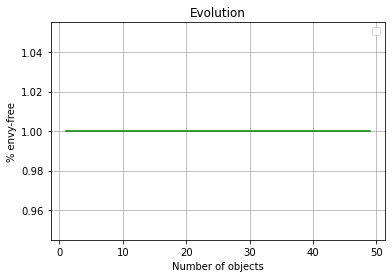

In [159]:
import matplotlib.pyplot as plt

nb_objects = 50
nb_iterations = 100
x,y = plot_likelihood(nb_objects,nb_iterations)

plt.title("Evolution")
plt.xlabel("Number of objects")
plt.ylabel("% envy-free")
plt.plot(x, y, c="green", label="")
plt.legend()
plt.grid()

In [90]:
# Tests

# Example 2 :
A = [1, 2, 3, 4]
B = [2, 3, 4, 1]

# Example 3 :
A = [1, 2, 3, 4, 5, 6]
B = [2, 3, 5, 4, 1, 6]


print(BT_allocation(A,B))

([1, 4], [2, 5], [3, 6])


### References

* The discussion and example about Adjusted Winner Manipulation is taken from a video by Eric Pacuit: 
https://www.youtube.com/watch?v=RtcnSXL69NQ

* See (Bouveret and Lang, IJCAI-11) for more details about picking sequences. 

* See https://www.ams.org/notices/201402/rnoti-p130.pdf for the description of the BT protocol. 

Notebook last updated 2022-01-17